# Universidad Politécnica de Yucatán
**Supervised Learining**

![UPY logo](http://mi-escuelamx.com/aspirantes_registro_upy/Imagenes/logoEncabezado.png)



## E3. Classification Models Unit 3

### Study Case: Cleveland Heart Disease
**Student:** Walter Roberto Vives Castro

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

# Warning
import warnings
warnings.filterwarnings("ignore")

## 1.  Business Undestanding

In [2]:
# Data Information
opened_file = open("Data/heart-disease.names") # Open File
read_file = opened_file.read() # Read File
data = read_file.split("\n") # Separate Lines
opened_file.close() # Close File
data # Show data

['Publication Request: ',
 '   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',
 '   This file describes the contents of the heart-disease directory.',
 '',
 '   This directory contains 4 databases concerning heart disease diagnosis.',
 '   All attributes are numeric-valued.  The data was collected from the',
 '   four following locations:',
 '',
 '     1. Cleveland Clinic Foundation (cleveland.data)',
 '     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)',
 '     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)',
 '     4. University Hospital, Zurich, Switzerland (switzerland.data)',
 '',
 '   Each database has the same instance format.  While the databases have 76',
 "   raw attributes, only 14 of them are actually used.  Thus I've taken the",
 '   liberty of making 2 copies of each database: one with all the attributes',
 '   and 1 with the 14 attributes actually used in past experiments.',
 '',
 '   The authors of the databases ha

**Models to use:**
1. Support Vector Machine
2. Decision Trees
3. Perceptron Algorithm
4. Logistic Regression

## 2. Data Preprocessing

In [3]:
headers = data[110:124]
headers

['      -- 1. #3  (age)       ',
 '      -- 2. #4  (sex)       ',
 '      -- 3. #9  (cp)        ',
 '      -- 4. #10 (trestbps)  ',
 '      -- 5. #12 (chol)      ',
 '      -- 6. #16 (fbs)       ',
 '      -- 7. #19 (restecg)   ',
 '      -- 8. #32 (thalach)   ',
 '      -- 9. #38 (exang)     ',
 '      -- 10. #40 (oldpeak)   ',
 '      -- 11. #41 (slope)     ',
 '      -- 12. #44 (ca)        ',
 '      -- 13. #51 (thal)      ',
 '      -- 14. #58 (num)       (the predicted attribute)']

In [4]:
# header
header = []
for element in headers:
    temporal = re.search("([A-Za-z]+)", element) 
    header.append(temporal.group())
header

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [5]:
# Data
opened_file2 = open("Data/processed.cleveland.data")
read_file2 = opened_file2.read()
data2 = read_file2.split("\n")
opened_file2.close()
data2[:10]

['63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0',
 '67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2',
 '67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1',
 '37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0',
 '41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0',
 '56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0',
 '62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3',
 '57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0',
 '63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2',
 '53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1']

In [6]:
# DataFrame
df = pd.read_csv("Data/processed.cleveland.data", names = header)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
# DataFrame Size 
print("Total Columns: {}".format(df.shape[1]))
print("Total Rows: {}".format(df.shape[0]))

Total Columns: 14
Total Rows: 303


In [8]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
# Missing Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# Localizate the index of the rows with -9.0 value
for element in header:
    print("{}: {}".format(element, df[element].loc[df[element] == -9.0].index.tolist()))

age: []
sex: []
cp: []
trestbps: []
chol: []
fbs: []
restecg: []
thalach: []
exang: []
oldpeak: []
slope: []
ca: []
thal: []
num: []


The description of the dataset says:

- Missing Attribute Values: Several.  Distinguished with value -9.0

In [11]:
# Localizate the index of the rows with "?" value
for element in header:
    print("{}: {}".format(element, df[element].loc[df[element] == "?"].index.tolist()))

age: []
sex: []
cp: []
trestbps: []
chol: []
fbs: []
restecg: []
thalach: []
exang: []
oldpeak: []
slope: []
ca: [166, 192, 287, 302]
thal: [87, 266]
num: []


In [12]:
# Remove "?" values
df.drop([166, 192, 287, 302, 87, 266], axis = 0, inplace = True)

# Reset Index
df.reset_index(drop = True, inplace = True)

In [13]:
# To numeric
df[["ca", "thal"]] = df[["ca", "thal"]].apply(pd.to_numeric)

# Verify data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [14]:
# Rename Column 
df.rename(columns = {"num":"target"}, inplace = True)

In [15]:
# Unique values in target column
df.target.unique()

array([0, 2, 1, 3, 4])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [17]:
df.target

0      0
1      2
2      1
3      0
4      0
      ..
292    1
293    1
294    2
295    3
296    1
Name: target, Length: 297, dtype: int64

In [18]:
# Target Binary form 
df["target"].iloc[df["target"].loc[df["target"] != 0].index] = 1

print("Unique Values: {}".format(df.target.unique()))

Unique Values: [0 1]


In [19]:
# Target Count
df["target"].value_counts()

0    160
1    137
Name: target, dtype: int64

In [20]:
# Statistical Descriptors
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


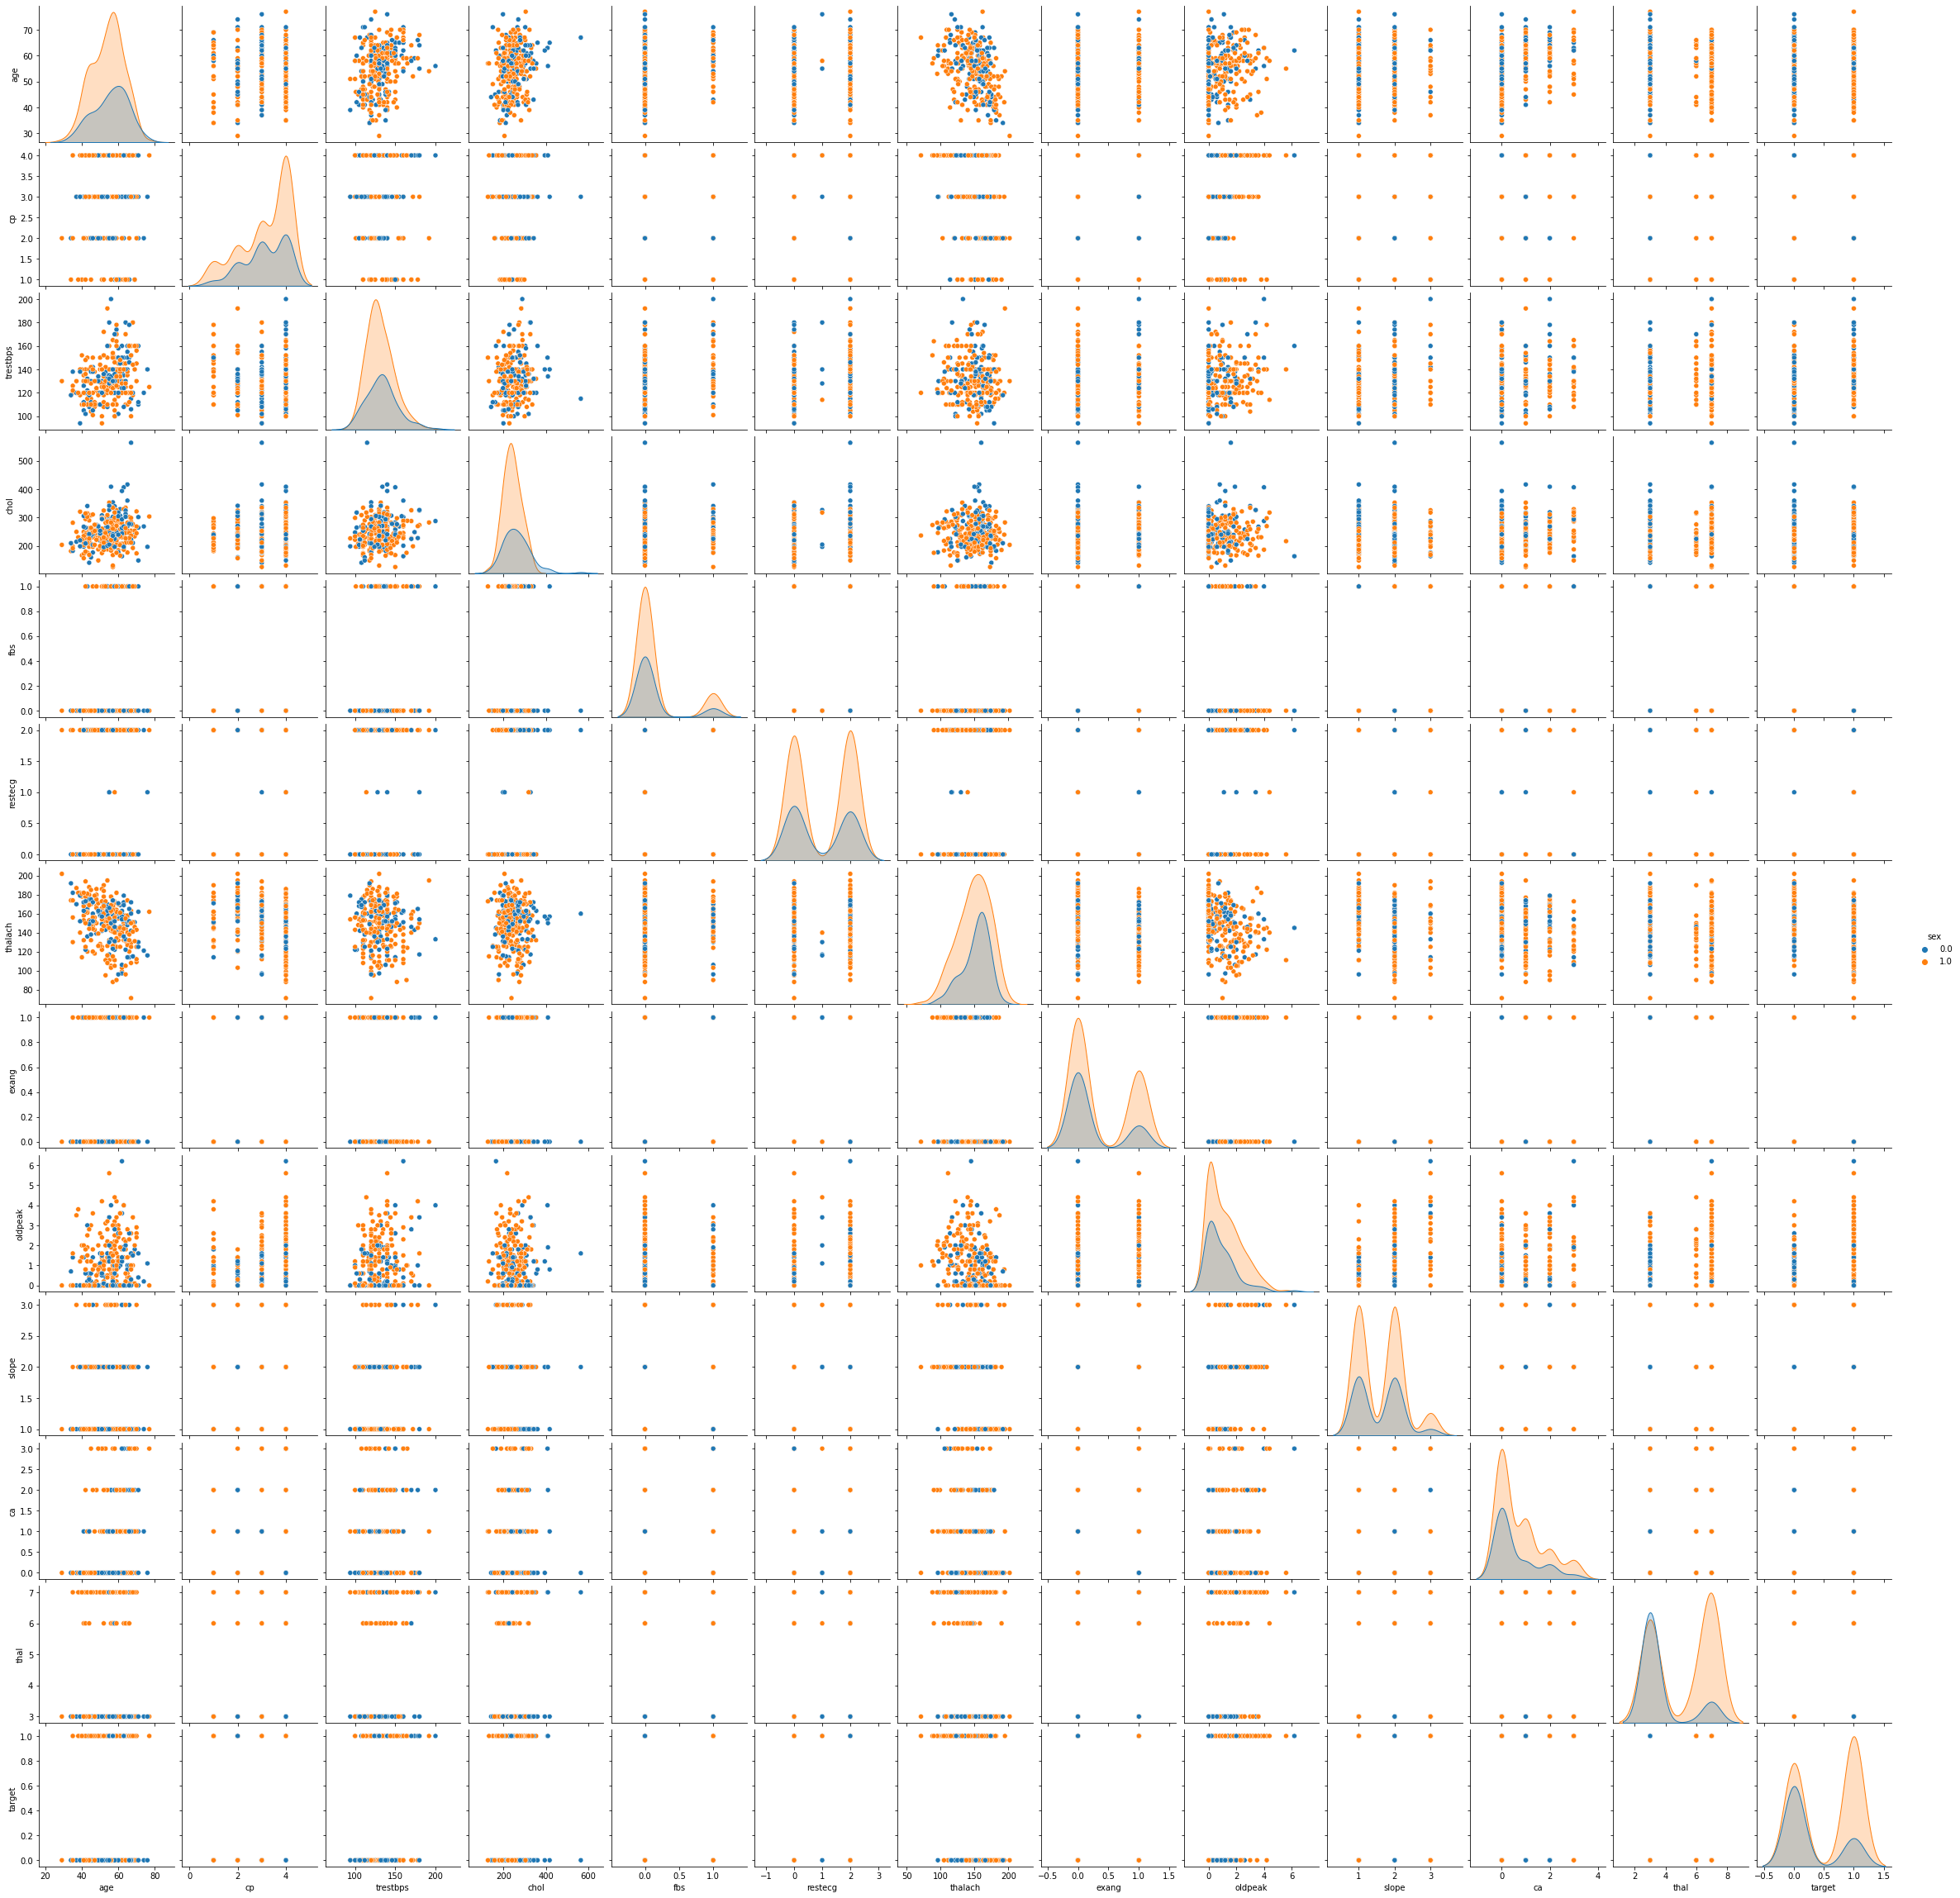

In [21]:
# Seaborn Pairplot
sns.pairplot(df, kind = "scatter", hue = "sex")

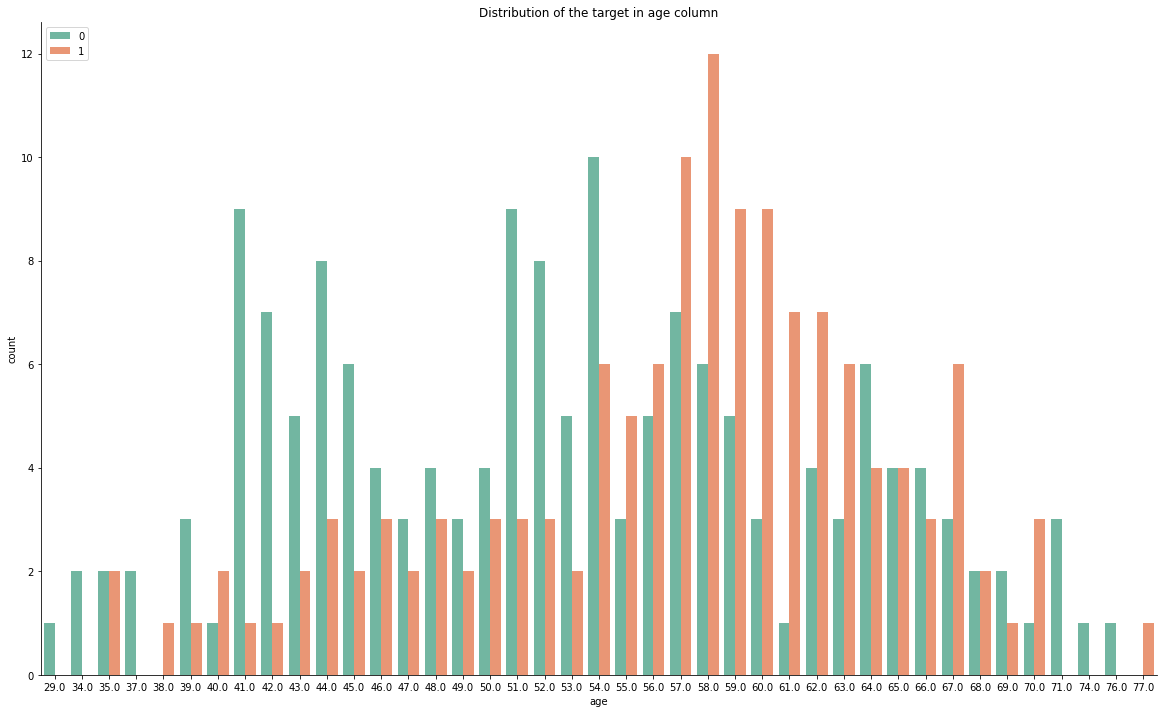

In [22]:
# Visualization of age column
fig, ax = plt.subplots(figsize=(20,12))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.countplot(x = "age", hue = "target", data = df, palette = "Set2")
plt.legend(loc = 'upper left')
plt.title("Distribution of the target in age column")
plt.show()

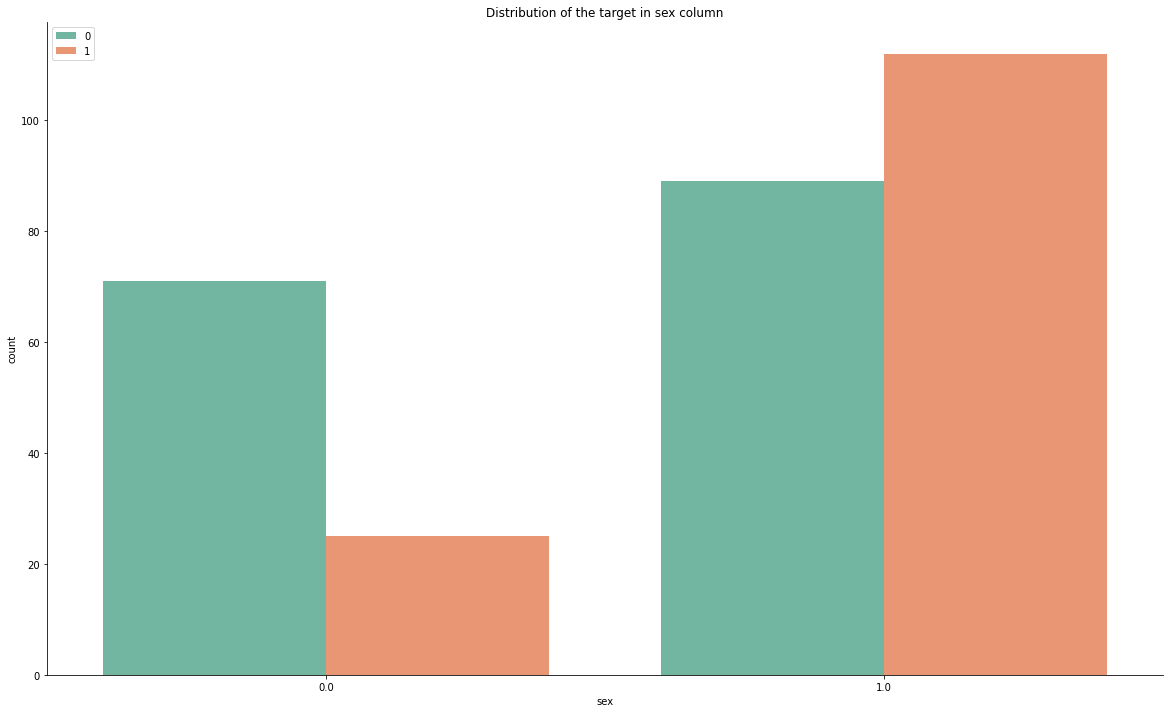

In [23]:
# Visualization of sex column
fig, ax = plt.subplots(figsize=(20,12))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.countplot(x = "sex", hue = "target", data = df, palette = "Set2")
plt.legend(loc = 'upper left')
plt.title("Distribution of the target in sex column")
plt.show()
# sex (1 = male; 0 = female)

## 3. Data Modelling

### 1. Support Vector Machine

In [24]:
# Data Preparation
df_data = df.loc[:, df.columns != "target"]
df_target = df["target"]

# Split Train & Test
X_train, X_test, y_train, y_test = train_test_split(df_data,
                                                    df_target,
                                                    train_size = 0.80,
                                                    test_size = 0.20,
                                                    random_state = 42)
# Shape
print("Data train: ", X_train.shape)
print("Data test: ", X_test.shape)

print("\nTarget train: ", y_train.shape)
print("Target test: ", y_test.shape)

Data train:  (237, 13)
Data test:  (60, 13)

Target train:  (237,)
Target test:  (60,)


In [27]:
# Make Score
roc_auc_SVM = make_scorer(roc_auc_score, needs_proba = True)

# Pipeline
pipe = Pipeline([('MMS', MinMaxScaler()),
                 ('SVC', SVC())
                ])

params = { 'SVC__C':[0.1,1,100,1000],'SVC__kernel':['rbf'],'SVC__degree':[1,2,3,4,5,6],
           'SVC__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'SVC__probability':[True]
         }


grid_svc = GridSearchCV(pipe,
                      param_grid = params,
                      scoring = roc_auc_SVM,
                      cv = 5)
print(grid_svc.fit(X_train, y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 1, 100, 1000],
                         'SVC__degree': [1, 2, 3, 4, 5, 6],
                         'SVC__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'SVC__kernel': ['rbf'], 'SVC__probability': [True]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))


In [28]:
# Best params
print("Best params: ", grid_svc.best_params_)

# Best model score
print("Best Model Score: ", grid_svc.score(X_train, y_train))

Best params:  {'SVC__C': 1000, 'SVC__degree': 5, 'SVC__gamma': 0.01, 'SVC__kernel': 'rbf', 'SVC__probability': True}
Best Model Score:  0.9367684841564372


- The best model score in GridSearchCV using accuracy is: 0.8649789029535865
- The best model score in GridSearchCV using roc_auc is: 0.9367684841564372

In [29]:
# Grid Prediction
grid_prediction_svc = grid_svc.predict(X_test)

### SVC Metrics

In [30]:
# Model Evaluation
print(classification_report(y_test, grid_prediction_svc))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



**1. Confusion Matrix**

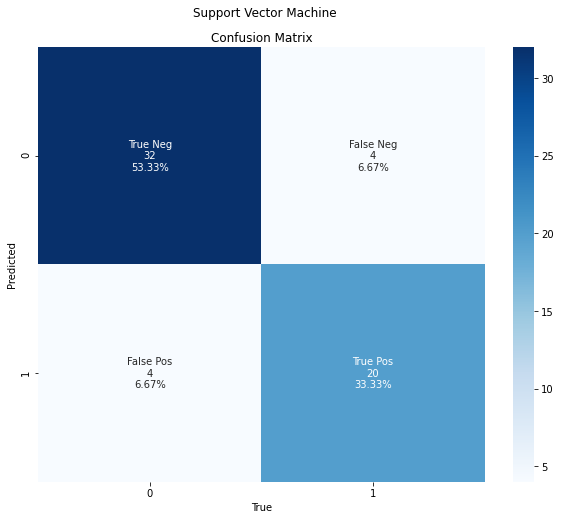

In [31]:
# Confusion Matrix
c_matrix_svc = confusion_matrix(y_test, grid_prediction_svc)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))



group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix_svc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix_svc.flatten()/np.sum(c_matrix_svc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_matrix_svc, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.suptitle("Support Vector Machine", y = 0.95, x = 0.44)
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

**2. Accuracy**

In [32]:
# SVM Accuracy 
acc_grid_svc = accuracy_score(y_test, grid_prediction_svc)
print("Accuracy: {}".format(acc_grid_svc))

Accuracy: 0.8666666666666667


**3. ROC and ROC AUC**

In [33]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, grid_prediction_svc)
print("FPR:        {}".format(fpr_svc))
print("TPR:        {}".format(tpr_svc))
print(" Thresholds:{}".format(thresholds_svc))

FPR:        [0.         0.11111111 1.        ]
TPR:        [0.         0.83333333 1.        ]
 Thresholds:[2 1 0]


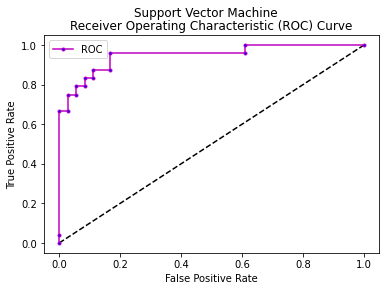

In [34]:
# Predict probabilities
probs_svc = grid_svc.predict_proba(X_test)

# Keep probabilities for the positive outcome only
probs_svc = probs_svc[:, 1]

# Calculate scores
auc_svc = roc_auc_score(y_test, probs_svc)

# Calculate roc curves
fpr_svc, tpr_svc, threshold = roc_curve(y_test, probs_svc)

# Plot the roc curve for the model
plt.plot([0,1], linestyle='--', color = 'black')
plt.plot(fpr_svc, tpr_svc, marker='.', label='ROC', markerfacecolor='blue', color='m')

# title
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.suptitle("Support Vector Machine")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [35]:
# ROC AUC Score
print("SVC ROC AUC: {:.3f}\n".format(auc_svc))
print("threshold:\n{}".format(threshold))

SVC ROC AUC: 0.948

threshold:
[1.97538474 0.97538474 0.63158661 0.62631452 0.58360459 0.5443645
 0.54013686 0.52353302 0.50641398 0.5        0.45918091 0.39277577
 0.3696191  0.15463519 0.14403901 0.03349509]


**4. Precision-Recall**

In [36]:
# Precision
precision_SVM = precision_score(y_test, grid_prediction_svc)
print("Precision: {:.3f}\n".format(precision_SVM))

# Recall
recall_SVM = recall_score(y_test, grid_prediction_svc)
print("Recall: {:.3f}\n".format(recall_SVM))

Precision: 0.833

Recall: 0.833



### 2. Decision Tree

In [39]:
# Define Score Metric
roc_auc_DT = make_scorer(roc_auc_score, needs_proba = True)

# Decision Tree Pipeline
DT_pipe = Pipeline([('MMS', MinMaxScaler()),
                    ("DT", DecisionTreeClassifier())
                   ])

# Decision Tree Parameters
depth_val = np.arange(2,11)
leaf_val = np.arange(1, 31, step = 9)
DT_params = [{'DT__max_depth': depth_val, 'DT__min_samples_leaf': leaf_val, 'DT__criterion':['entropy', 'gini']}]

# Decision Tree Grid
grid_DT = GridSearchCV(DT_pipe,
                       param_grid = DT_params,
                       scoring = roc_auc_DT,
                       cv = 5)

print(grid_DT.fit(X_train, y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('DT', DecisionTreeClassifier())]),
             param_grid=[{'DT__criterion': ['entropy', 'gini'],
                          'DT__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'DT__min_samples_leaf': array([ 1, 10, 19, 28])}],
             scoring=make_scorer(roc_auc_score, needs_proba=True))


In [40]:
# Best params
print("Best params: ", grid_DT.best_params_)

# Best model score
print("Best Model Score: ", grid_DT.score(X_train, y_train))

Best params:  {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 10}
Best Model Score:  0.935448187268056


- The best model score in GridSearchCV using accuracy is: 0.8438818565400844
- The best model score in GridSearchCV using roc_auc is: 0.935448187268056

In [41]:
# Grid Prediction
grid_prediction_DT = grid_DT.predict(X_test)

### DT Metrics

In [42]:
# Model Evaluation
print(classification_report(y_test, grid_prediction_DT))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.71      0.83      0.77        24

    accuracy                           0.80        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



**1. Confusion Matrix**

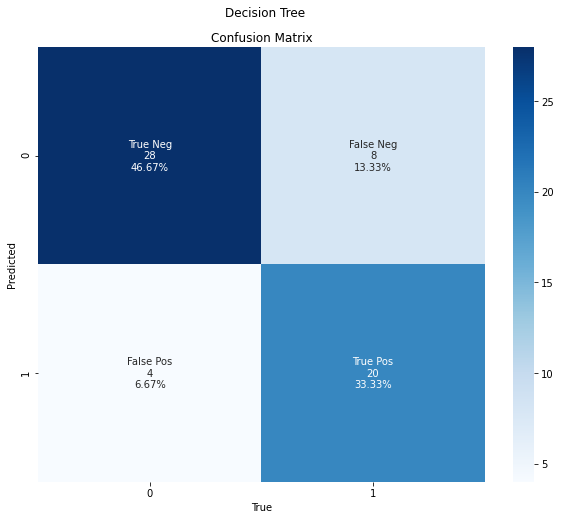

In [43]:
# Confusion Matrix
c_matrix_DT = confusion_matrix(y_test, grid_prediction_DT)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))



group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix_DT.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix_DT.flatten()/np.sum(c_matrix_DT)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_matrix_DT, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.suptitle("Decision Tree", y = 0.95, x = 0.44)
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

**2. Accuracy**

In [44]:
# DT Accuracy 
acc_grid_DT = accuracy_score(y_test, grid_prediction_DT)
print("Accuracy: {}".format(acc_grid_DT))

Accuracy: 0.8


**3. ROC and ROC AUC**

In [45]:
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, grid_prediction_DT)
print("FPR:        {}".format(fpr_DT))
print("TPR:        {}".format(tpr_DT))
print(" Thresholds:{}".format(thresholds_DT))

FPR:        [0.         0.22222222 1.        ]
TPR:        [0.         0.83333333 1.        ]
 Thresholds:[2 1 0]


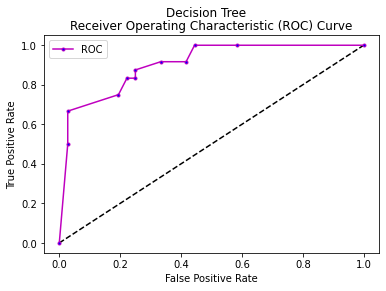

In [46]:
# Predict probabilities
probs_DT = grid_DT.predict_proba(X_test)

# Keep probabilities for the positive outcome only
probs_DT = probs_DT[:, 1]

# Calculate scores
auc_DT = roc_auc_score(y_test, probs_DT)

# Calculate roc curves
fpr_DT, tpr_DT, threshold_DT = roc_curve(y_test, probs_DT)

# Plot the roc curve for the model
plt.plot([0,1], linestyle='--', color = 'black')
plt.plot(fpr_DT, tpr_DT, marker='.', label='ROC', markerfacecolor='blue', color='m')

# title
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.suptitle("Decision Tree")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# Save fig
#plt.savefig("(1) ROC_DT.png")

# show the plot
plt.show()

In [47]:
# ROC AUC Score
print("SVC ROC AUC: {:.3f}\n".format(auc_DT))
print("threshold:\n{}".format(threshold_DT))

SVC ROC AUC: 0.903

threshold:
[2.         1.         0.76923077 0.72222222 0.6        0.5
 0.45454545 0.25       0.18181818 0.1        0.08333333 0.        ]


**4. Precision-Recall**

$Precision:  \frac{TP}{TP + FP}$
; Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. **What proportion of positive identifications was actually correct?**


$Recall:  \frac{TP}{TP + FN}$
; Recall is the ratio of correctly predicted positive observations to the all observations in actual class. **What proportion of actual positives was identified correctly?**

In [48]:
# Precision
precision_DT = precision_score(y_test, grid_prediction_DT)
print("Precision: {:.3f}\n".format(precision_DT))

# Recall
recall_DT = recall_score(y_test, grid_prediction_DT)
print("Recall: {:.3f}\n".format(recall_DT))

Precision: 0.714

Recall: 0.833



### 3. Logistic Regression

In [51]:
# Define Score Metric
roc_auc_LR = make_scorer(roc_auc_score, needs_proba = True)

# Logistic Regression Pipeline
LR_pipe = Pipeline([('MMS', MinMaxScaler()),
                    ("LR", LogisticRegression())
                   ])

# Logistic Regression Parameters


LR_params = {'LR__penalty': ['l1','l2'], 'LR__C': [0.001,0.01,0.1,1,10,100,1000]}

# Logistic Regression Grid
grid_LR = GridSearchCV(LR_pipe,
                       param_grid = LR_params,
                       scoring = roc_auc_LR,
                       cv = 5)

print(grid_LR.fit(X_train, y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'LR__penalty': ['l1', 'l2']},
             scoring=make_scorer(roc_auc_score, needs_proba=True))


In [52]:
# Best params
print("Best params: ", grid_LR.best_params_)

# Best model score
print("Best Model Score: ", grid_LR.score(X_train, y_train))

Best params:  {'LR__C': 1, 'LR__penalty': 'l2'}
Best Model Score:  0.9140022837567799


- The best model score in GridSearchCV using accuracy is: 0.8270042194092827
- The best model score in GridSearchCV using roc_auc is: 0.9140022837567799

In [53]:
# Grid Prediction
grid_prediction_LR = grid_LR.predict(X_test)

### LR Metrics

In [54]:
# Model Evaluation
print(classification_report(y_test, grid_prediction_LR))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



**1. Confusion Matrix**

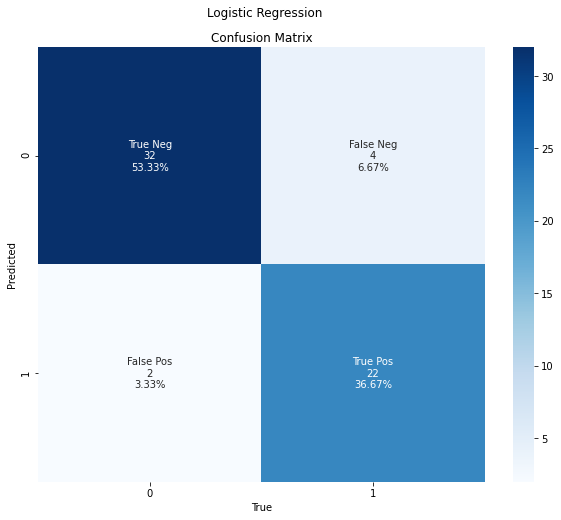

In [55]:
# Confusion Matrix
c_matrix_LR = confusion_matrix(y_test, grid_prediction_LR)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))



group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix_LR.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix_LR.flatten()/np.sum(c_matrix_LR)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_matrix_LR, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.suptitle("Logistic Regression", y = 0.95, x = 0.44)
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

**2. Accuracy**

In [56]:
# SVM Accuracy 
acc_grid_LR = accuracy_score(y_test, grid_prediction_LR)
print("Accuracy: {}".format(acc_grid_LR))

Accuracy: 0.9


**3. ROC and ROC AUC**

In [57]:
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, grid_prediction_LR)
print("FPR:        {}".format(fpr_LR))
print("TPR:        {}".format(tpr_LR))
print(" Thresholds:{}".format(thresholds_LR))

FPR:        [0.         0.11111111 1.        ]
TPR:        [0.         0.91666667 1.        ]
 Thresholds:[2 1 0]


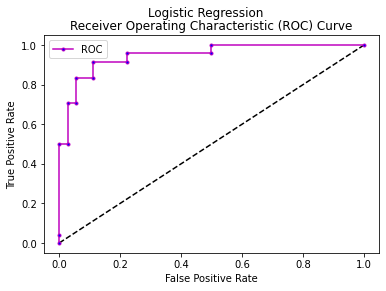

In [58]:
# Predict probabilities
probs_LR = grid_LR.predict_proba(X_test)

# Keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]

# Calculate scores
auc_LR = roc_auc_score(y_test, probs_LR)

# Calculate roc curves
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_test, probs_LR)

# Plot the roc curve for the model
plt.plot([0,1], linestyle='--', color = 'black')
plt.plot(fpr_LR, tpr_LR, marker='.', label='ROC', markerfacecolor='blue', color='m')

# title
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.suptitle("Logistic Regression")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [59]:
# ROC AUC Score
print("LR ROC AUC: {:.3f}\n".format(auc_LR))
print("threshold:\n{}".format(threshold_LR))

LR ROC AUC: 0.948

threshold:
[1.97843831 0.97843831 0.79934275 0.79361033 0.6036624  0.6023547
 0.54739825 0.52458614 0.51286823 0.27950542 0.2704683  0.16909321
 0.16353293 0.02631204]


**4. Precision-Recall**

In [60]:
# Precision
precision_LR = precision_score(y_test, grid_prediction_LR)
print("Precision: {:.3f}\n".format(precision_LR))

# Recall
recall_LR = recall_score(y_test, grid_prediction_LR)
print("Recall: {:.3f}\n".format(recall_LR))

Precision: 0.846

Recall: 0.917



### 4. Perceptron

In [61]:
# Perceptron Pipeline
PC_pipe = Pipeline([('MMS', MinMaxScaler()),
                    ("PC", Perceptron())
                   ])

# Perceptron Parameters
alphas = [1, 10, 0.01, 0.001 , 0.0001, 0.00001, 0.000001, 0.0000001]
PC_params = {'PC__penalty': ['l1','l2', 'elasticnet', None], 'PC__alpha': alphas}

# Perceptron Grid
grid_PC = GridSearchCV(PC_pipe,
                       param_grid = PC_params,
                       scoring = 'accuracy',
                       cv = 5)

print(grid_PC.fit(X_train, y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MMS', MinMaxScaler()),
                                       ('PC', Perceptron())]),
             param_grid={'PC__alpha': [1, 10, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                       1e-07],
                         'PC__penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')


In [62]:
# Best params
print("Best params: ", grid_PC.best_params_)

# Best model score
print("Best Model Score: ", grid_PC.score(X_train, y_train))

Best params:  {'PC__alpha': 1e-06, 'PC__penalty': 'l1'}
Best Model Score:  0.7805907172995781


In [63]:
# Grid Prediction
grid_prediction_PC = grid_PC.predict(X_test)

**1. Confusion Matrix**

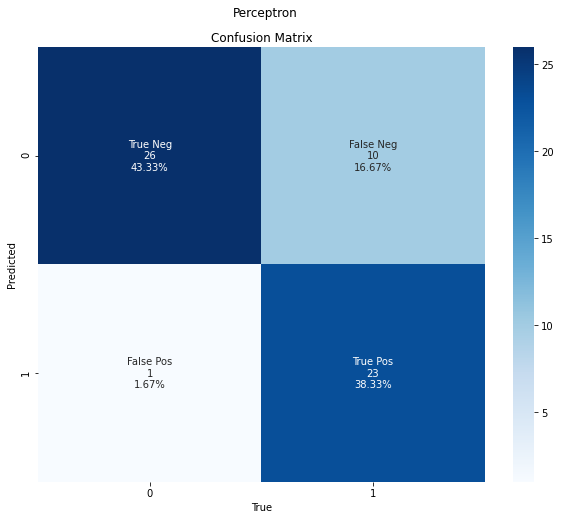

In [64]:
# Confusion Matrix
c_matrix_PC = confusion_matrix(y_test, grid_prediction_PC)

# Confusion Matrix Visualization
plt.figure(figsize = (10, 8))



group_names = ["True Neg","False Neg","False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                c_matrix_PC.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     c_matrix_PC.flatten()/np.sum(c_matrix_PC)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(c_matrix_PC, annot=labels, fmt="", cmap='Blues')

plt.title("Confusion Matrix")
plt.suptitle("Perceptron", y = 0.95, x = 0.44)
plt.ylabel("Predicted")
plt.xlabel("True")

plt.show()

**2. Accuracy**

In [65]:
# SVM Accuracy 
acc_grid_PC = accuracy_score(y_test, grid_prediction_PC)
print("Accuracy: {}".format(acc_grid_PC))

Accuracy: 0.8166666666666667


**3. Precision-Recall**

In [66]:
# Precision
precision_PC = precision_score(y_test, grid_prediction_PC)
print("Precision: {:.3f}\n".format(precision_LR))

# Recall
recall_PC = recall_score(y_test, grid_prediction_PC)
print("Recall: {:.3f}\n".format(recall_PC))

Precision: 0.846

Recall: 0.958



# Benchmarking

In [67]:
SVM_metrics = [auc_svc, acc_grid_svc, precision_SVM, recall_SVM]
DecisionTree_metrics = [auc_DT, acc_grid_DT, precision_DT, recall_DT]
LogisticRegression_metrics = [auc_LR, acc_grid_LR, precision_LR, recall_LR]
Perceptron_metrics = ["-", acc_grid_PC, precision_PC, recall_PC]
pd.DataFrame(columns = ["ROC AUC","Accuracy","Precision", "Recall"],
             
             data = [SVM_metrics, DecisionTree_metrics, LogisticRegression_metrics, Perceptron_metrics],
             
             index = ["Support Vector Machines", "Decision Tree", "Logistic Regression", "Perceptron"]).T

,Support Vector Machines,Decision Tree,Logistic Regression,Perceptron
ROC AUC,0.947917,0.903356,0.947917,-
Accuracy,0.866667,0.8,0.9,0.816667
Precision,0.833333,0.714286,0.846154,0.69697
Recall,0.833333,0.833333,0.916667,0.958333


The best general model is: **Logistic Regression** with the params:  `{'C': 1, 'penalty': 'l2'}` and its best metric is: `ROC AUC` with **0.947917**

Also, that model got `Recall`: **0.916667**. That means, that in all the true values the model classify correctly the true values and has low false negative values. In this study case, it means that in all the positive case of heart disease, the model has a high performance in classifying people who actually have heart disease.

It can be noticed that **Support Vector Machines** and **Logistic Regression** have the same performance in **ROC AUC** metric evaluation.

The distribution of the target values is:
- 0: 160 
- 1: 137

It can be noticed that there are imbalanced classes. Given the results of the models evaluation it can be noticed that the metric **accuracy** was not the best given that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions. Therefore, accuracy has a better performance with balanced classes. In this case, the imbalance of classes affects the model evaluation.



Another particularity is that looking at the table it can be noticed that in the **Support Vector Machine Model**, it was gotten the same value for **precision & recall**.

To contextualize,

$Precision:  \frac{TP}{TP + FP}$
; Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. **What proportion of positive identifications was actually correct?**


$Recall:  \frac{TP}{TP + FN}$
; Recall is the ratio of correctly predicted positive observations to the all observations in actual class. **What proportion of actual positives was identified correctly?**

Therefore, 

If Precision is equal to Recall; This means that the algorithm has classified an equal amount of dataset as false positives (FP), as it classified false negatives (FN).

It can be confirmed in the confusion matrix in which FP = FN (the number of false positives is equal to the number of false negatives).


# References

[1] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[2] https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/

[3] https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

[4] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

[5] https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

[6] https://www.researchgate.net/post/In-machine-learning-classifier-can-the-values-of-Precision-and-recall-be-the-sameIf-yes-then-what-is-the-reason-behind-it

[7] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

[8] https://scikit-learn.org/stable/

[9] https://www.researchgate.net/post/In-machine-learning-classifier-can-the-values-of-Precision-and-recall-be-the-sameIf-yes-then-what-is-the-reason-behind-it

[10] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

[11] https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/